In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import warnings; warnings.simplefilter('ignore')
import sys
sys.path.insert(0, '/Users/jsmonzon/Research/SatGen/mcmc/src/')
import jsm_halopull
import jsm_SHMR
import jsm_mcmc
import jsm_stats
import jsm_models


In [3]:
plt.style.use('bmh')
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.grid'] = False
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['axes.labelsize'] = 15
plt.rc('legend',fontsize=15) # using a size in points


### simple model for the data

In [4]:
truths_S = [10.5, 1.9, 0.2, 0, 0, 0] # [10.5, 1.9, 0.2, -0.05, 0.01, 1.2]

plabels = ["$M_{*}$", "$\\alpha$", "$\\sigma$"," $\\gamma$", "$\\beta$", "$\\tau$"]

priors = [[9.5,11.5], [-1,7], [0,5], [-2,2], [-3,2], [-2,2]]

plot_range = [[9.8,11.2], [1.7, 2.3], [0,1.6], [-2,2], [-3,2], [-2,2]]

ndim_short = 3

Nstack = 500

In [5]:
ms_45 = jsm_mcmc.single_chain("../../mcmc/model_runs/survey/MinMass/model_4-5/chain.h5", Nstack, Ndim=ndim_short, truths=truths_S, labels=plabels)

ms_50 = jsm_mcmc.single_chain("../../mcmc/model_runs/survey/MinMass/model_5-0/chain.h5", Nstack, Ndim=ndim_short, truths=truths_S, labels=plabels)

ms_55 = jsm_mcmc.single_chain("../../mcmc/model_runs/survey/MinMass/model_5-5/chain.h5", Nstack, Ndim=ndim_short, truths=truths_S, labels=plabels)

ms_60 = jsm_mcmc.single_chain("../../mcmc/model_runs/survey/MinMass/model_6-0/chain.h5", Nstack, Ndim=ndim_short, truths=truths_S, labels=plabels)

ms_65 = jsm_mcmc.single_chain("../../mcmc/model_runs/simple_fid/model_A/chain.h5", Nstack, Ndim=ndim_short, truths=truths_S, labels=plabels)

In [6]:
mlabels = ["logMs=4.5", "logMs=5.0", "logMs=5.5", "logMs=6.0", "logMs=6.5"]

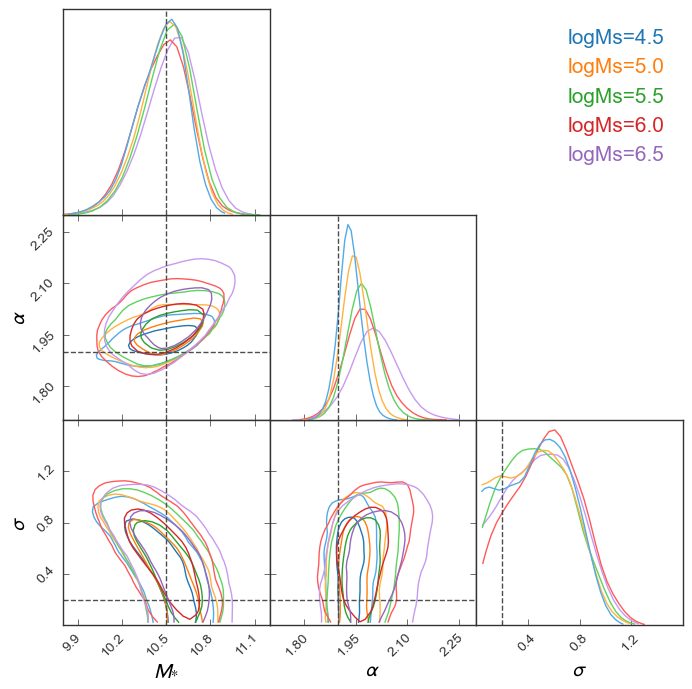

In [7]:
analysis = jsm_mcmc.multi_chain(np.array([ms_45.end, ms_50.end, ms_55.end, ms_60.end, ms_65.end]), ndim_short, truths_S, plot_range, plabels, mlabels, nsigma=2, fill=False, smooth=1.3, title="Model A Used to Create Mock")

analysis.trim()

analysis.plot_posteriors()

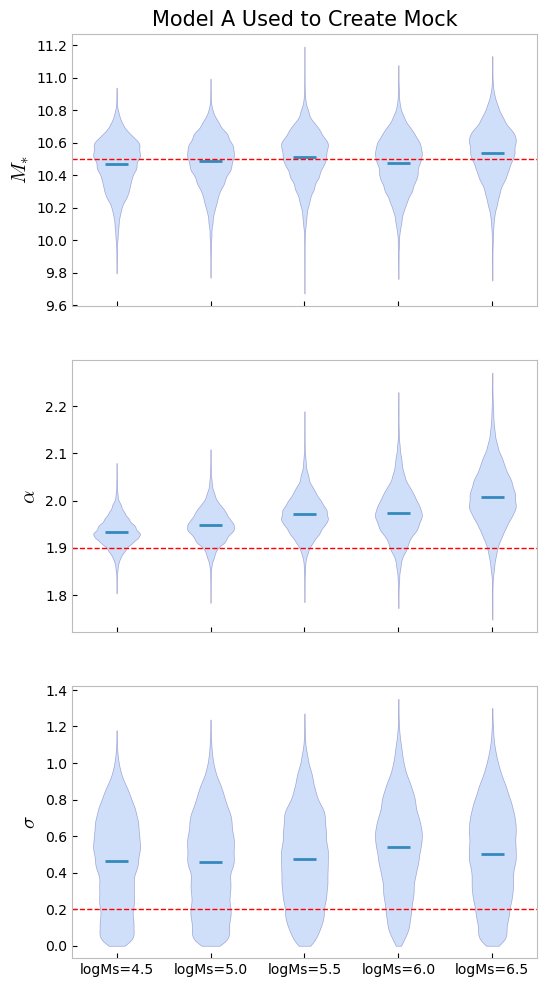

In [8]:
analysis.violin(3)

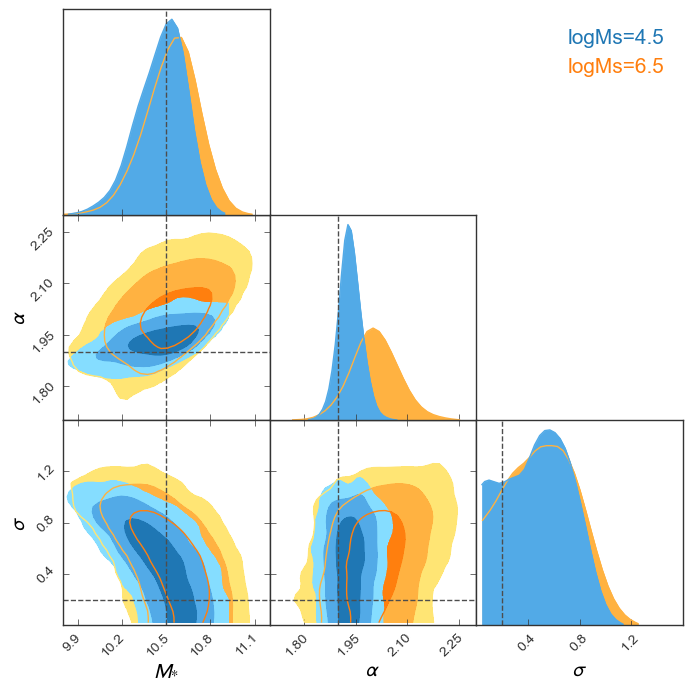

In [9]:
analysis = jsm_mcmc.multi_chain(np.array([ms_45.end, ms_65.end]), ndim_short, truths_S, plot_range, plabels, [mlabels[0], mlabels[4]], nsigma=3, fill=True, smooth=1.3, title="Model A Used to Create Mock")

analysis.trim()

analysis.plot_posteriors(save_file="../../../paper_1/figures/Mimass.pdf")